In [1]:
!pip install "numpy<1.23" scipy

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception # type: ignore
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, models, losses, optimizers

2025-01-08 00:59:40.752217: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
img = load_img("./data/train/ambarella/ambarella_00003.jpg", target_size=(150,150))

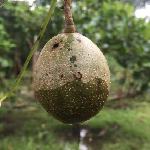

In [4]:
img

In [5]:
np.array(img).shape

(150, 150, 3)

# Train model

In [6]:
def make_model():
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    
    ########################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training = False)
    vectors = layers.GlobalAveragePooling2D()(base)
    inner = layers.Dense(64, activation='relu')(vectors)
    outputs = layers.Dense(5)(inner)
    model = keras.Model(inputs, outputs)
    ########################
    
    # optimizer = optimizers.Adam(learning_rate=learning_rate)
    loss = losses.CategoricalCrossentropy(from_logits=True)

    # model.compile(
    #     optimizer=optimizer,
    #     loss=loss,
    #     metrics=['accuracy']
    # )
    model.compile(loss = loss, metrics=['accuracy'])

    return model



In [7]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 513 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [8]:
model = make_model()

2025-01-08 00:59:42.522339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-08 00:59:42.528836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-08 00:59:42.529027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-08 00:59:42.529513: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [9]:
# history = model.fit(train_ds, validation_data = val_ds)

In [10]:
history

!pip install "numpy<1.23" scipy
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception # type: ignore
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, models, losses, optimizers
img = load_img("./data/train/ambarella/ambarella_00003.jpg", target_size=(150,150))
img
np.array(img).shape
def make_model():
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    
    ########################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training = False)
    vectors = layers.GlobalAveragePooling2D()(base)
    inner = layers.Dense(64, activation='relu')(vectors)
    output

Hyperparameter i will try:
- inner dense layer size
- learning rate
- epochs(using checkpoint)

And try another model if i have enough time

# Learning rate Optimize

In [26]:
scores = {}
def make_model(
        base_model = Xception(
            weights='imagenet',
            include_top=False,
            input_shape=(150, 150, 3)
        ),
        dense_inner_size = 64,
        learning_rate = 0.001
):
    
    ########################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training = True)
    vectors = layers.GlobalAveragePooling2D()(base)
    inner = layers.Dense(dense_inner_size, activation='relu')(vectors)
    outputs = layers.Dense(5)(inner)
    model = keras.Model(inputs, outputs)

    '][==]'
    ########################
    
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    loss = losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    model.compile(loss = loss, metrics=['accuracy'])

    return model

for lr in [0.00001,0.0001, 0.001, 0.01, 0.1]:
    print("Learning rate: ", lr)
    model = make_model(
        learning_rate=lr
    )

    # early_stopping = keras.callbacks.EarlyStopping(
    #     monitor = "val_accuracy",
    #     patience = 5,
    #     restore_best_weights=True
    # )

    # history = model.fit(train_ds, epochs = 30, validation_data = val_ds, callbacks=[early_stopping])
    history = model.fit(train_ds, epochs = 30, validation_data = val_ds)
    scores[lr] = history.history


Learning rate:  1e-05
Epoch 1/30
17/17 [==============================] - 13s 314ms/step - loss: 0.6895 - accuracy: 0.7778 - val_loss: 3.0222 - val_accuracy: 0.4400
Epoch 2/30
17/17 [==============================] - 4s 259ms/step - loss: 0.1623 - accuracy: 0.9571 - val_loss: 3.3190 - val_accuracy: 0.4600
Epoch 3/30
17/17 [==============================] - 4s 259ms/step - loss: 0.1142 - accuracy: 0.9688 - val_loss: 3.5328 - val_accuracy: 0.6700
Epoch 4/30
17/17 [==============================] - 4s 258ms/step - loss: 0.0432 - accuracy: 0.9922 - val_loss: 2.1331 - val_accuracy: 0.5000
Epoch 5/30
17/17 [==============================] - 4s 259ms/step - loss: 0.1354 - accuracy: 0.9766 - val_loss: 3.6892 - val_accuracy: 0.6000
Epoch 6/30
17/17 [==============================] - 4s 257ms/step - loss: 0.0403 - accuracy: 0.9903 - val_loss: 2.7398 - val_accuracy: 0.5600
Epoch 7/30
17/17 [==============================] - 4s 260ms/step - loss: 0.0123 - accuracy: 0.9942 - val_loss: 2.3303 - val_

In [39]:
lrs = list(scores.keys())
for lr in lrs:
    print(scores[lr]['val_accuracy'])

[0.4399999976158142, 0.46000000834465027, 0.6700000166893005, 0.5, 0.6000000238418579, 0.5600000023841858, 0.5299999713897705, 0.5600000023841858, 0.5, 0.5299999713897705, 0.5699999928474426, 0.4699999988079071, 0.5, 0.5799999833106995, 0.5199999809265137, 0.3499999940395355, 0.550000011920929, 0.5299999713897705, 0.5699999928474426, 0.47999998927116394, 0.47999998927116394, 0.6000000238418579, 0.5899999737739563, 0.47999998927116394, 0.5199999809265137, 0.49000000953674316, 0.5099999904632568, 0.5600000023841858, 0.550000011920929, 0.5199999809265137]
[0.5099999904632568, 0.5199999809265137, 0.5400000214576721, 0.6299999952316284, 0.5600000023841858, 0.5400000214576721, 0.5, 0.6499999761581421, 0.5199999809265137, 0.6200000047683716, 0.5299999713897705, 0.5099999904632568, 0.5799999833106995, 0.5899999737739563, 0.5400000214576721, 0.5299999713897705, 0.47999998927116394, 0.44999998807907104, 0.5699999928474426, 0.47999998927116394, 0.6200000047683716, 0.6299999952316284, 0.6100000143

# Inner Dense Layer Size Optimze

In [ ]:
scores = {}
def make_model(
        base_model = Xception(
            weights='imagenet',
            include_top=False,
            input_shape=(150, 150, 3)
        ),
        dense_inner_size = 64,
        learning_rate = ?
):
    
    ########################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training = True)
    vectors = layers.GlobalAveragePooling2D()(base)
    inner = layers.Dense(dense_inner_size, activation='relu')(vectors)
    outputs = layers.Dense(5)(inner)
    model = keras.Model(inputs, outputs)

    '][==]'
    ########################
    
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    loss = losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    model.compile(loss = loss, metrics=['accuracy'])

    return model

for size in []:
    print("Inner Size: ", size)
    model = make_model(
        dense_inner_size = size
    )
    history = model.fit(train_ds, epochs = 30, validation_data = val_ds)
    scores[size] = history.history
    